### 1.

In [1]:
import seaborn as sns
iris=sns.load_dataset("iris")

1) 붓꽃(iris) 데이텅서 붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width)등의 평균을 구하라.

In [2]:
iris.groupby('species')['sepal_length','sepal_width'].mean()

<ipython-input-2-7762800b6a22>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris.groupby('species')['sepal_length','sepal_width'].mean()


,sepal_length,sepal_width
species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


2) 붓꽃 종별로 표준화를 한 다음, 종별로 가장 유사한 붓꽃 번호를 출력하시오

In [3]:
iris['sepal_length_std']=(iris['sepal_length']-iris['sepal_length'].mean())/iris['sepal_length'].std()
iris['sepal_width_std']=(iris['sepal_width']-iris['sepal_width'].mean())/iris['sepal_width'].std()
iris['petal_length_std']=(iris['petal_length']-iris['petal_length'].mean())/iris['petal_length'].std()
iris['petal_width_std']=(iris['petal_width']-iris['petal_width'].mean())/iris['petal_width'].std()
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,5.1,3.5,1.4,0.2,setosa,-0.897674,1.015602,-1.335752,-1.311052
1,4.9,3.0,1.4,0.2,setosa,-1.139200,-0.131539,-1.335752,-1.311052
2,4.7,3.2,1.3,0.2,setosa,-1.380727,0.327318,-1.392399,-1.311052
3,4.6,3.1,1.5,0.2,setosa,-1.501490,0.097889,-1.279104,-1.311052
4,5.0,3.6,1.4,0.2,setosa,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.034539,-0.131539,0.816859,1.443994
146,6.3,2.5,5.0,1.9,virginica,0.551486,-1.278680,0.703564,0.919223
147,6.5,3.0,5.2,2.0,virginica,0.793012,-0.131539,0.816859,1.050416
148,6.2,3.4,5.4,2.3,virginica,0.430722,0.786174,0.930154,1.443994


In [4]:
iris['거리']=((iris['sepal_length']-iris['sepal_length_std'])**2+(iris['sepal_width']-iris['sepal_width_std'])**2+
(iris['petal_length']-iris['petal_length_std'])**2+(iris['petal_width']-iris['petal_width_std'])**2)**0.5
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,거리
0,5.1,3.5,1.4,0.2,setosa,-0.897674,1.015602,-1.335752,-1.311052,7.204994
1,4.9,3.0,1.4,0.2,setosa,-1.139200,-0.131539,-1.335752,-1.311052,7.486394
2,4.7,3.2,1.3,0.2,setosa,-1.380727,0.327318,-1.392399,-1.311052,7.399989
3,4.6,3.1,1.5,0.2,setosa,-1.501490,0.097889,-1.279104,-1.311052,7.499837
4,5.0,3.6,1.4,0.2,setosa,-1.018437,1.245030,-1.335752,-1.311052,7.178794
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.034539,-0.131539,0.816859,1.443994,7.864392
146,6.3,2.5,5.0,1.9,virginica,0.551486,-1.278680,0.703564,0.919223,8.169769
147,6.5,3.0,5.2,2.0,virginica,0.793012,-0.131539,0.816859,1.050416,7.905054
148,6.2,3.4,5.4,2.3,virginica,0.430722,0.786174,0.930154,1.443994,7.799289


방법1

In [5]:
def top2(df):
    return df.sort_values(by='거리')[:2]

iris.groupby('species').apply(top2)

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     15            5.7          4.4           1.5          0.4   
           14            5.8          4.0           1.2          0.2   
versicolor 50            7.0          3.2           4.7          1.4   
           85            6.0          3.4           4.5          1.6   
virginica  131           7.9          3.8           6.4          2.0   
           109           7.2          3.6           6.1          2.5   

                   species  sepal_length_std  sepal_width_std  \
species                                                         
setosa     15       setosa         -0.173094         3.080455   
           14       setosa         -0.052331         2.162743   
versicolor 50   versicolor          1.396829         0.327318   
           85   versicolor          0.189196         0.786174   
virginica  131   virginica          2.483699         1.703886   
           109   virginica          1.638355         1.245030   

                petal_length_std  petal_width_std        거리  
species                                                      
setosa     15          -1.279104        -1.048667  6.786493  
           14          -1.449047        -1.311052  6.850257  
versicolor 50           0.533621         0.263260  7.635360  
           85           0.420326         0.525645  7.641696  
virginica  131          1.496631         1.050416  7.659945  
           109          1.326688         1.706379  7.739000

방법2

In [6]:
iris.sort_values(by='거리').groupby(iris['species']).head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,거리
15,5.7,4.4,1.5,0.4,setosa,-0.173094,3.080455,-1.279104,-1.048667,6.786493
14,5.8,4.0,1.2,0.2,setosa,-0.052331,2.162743,-1.449047,-1.311052,6.850257
50,7.0,3.2,4.7,1.4,versicolor,1.396829,0.327318,0.533621,0.263260,7.635360
85,6.0,3.4,4.5,1.6,versicolor,0.189196,0.786174,0.420326,0.525645,7.641696
131,7.9,3.8,6.4,2.0,virginica,2.483699,1.703886,1.496631,1.050416,7.659945
109,7.2,3.6,6.1,2.5,virginica,1.638355,1.245030,1.326688,1.706379,7.739000


### 2.

In [7]:
tips=sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1)팁의 비율이 요일과 점심/저녁 여부, 인원수에 어떤 영향을 받는지 살펴본다.

In [8]:
# 요일기준
tips.groupby('day').mean()
#  Sun > Sat > Thur > Fri 순으로 많이받음

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [9]:
# 점심/저녁 기준
tips.groupby('time').mean()
# 저녁에 더 많은 팁을 받음

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


In [10]:
# 인원기준
tips.groupby('size').mean()

# 6명 > 4명 > 5명 > 3명 > 2명 > 1명 순서로 많이받는다

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


2) 어떤 요인이 가장 크게 작용하는지 판단할 수 있는 방법이 있는가?
- 상관계수를 비교할 수 있는 heatmap으로 시각화해서 확인해보겠다.

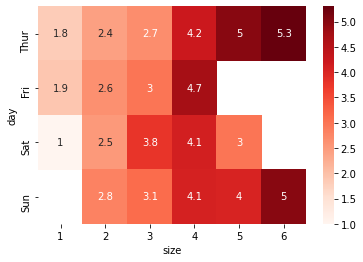

In [13]:
import matplotlib.pyplot as plt
pivot = tips.pivot_table(index='day', columns='size', values='tip')
sns.heatmap(pivot, cmap='Reds', annot=True)
plt.show()

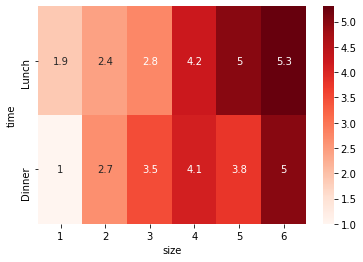

In [14]:
pivot = tips.pivot_table(index='time', columns='size', values='tip')
sns.heatmap(pivot, cmap='Reds', annot=True)
plt.show()

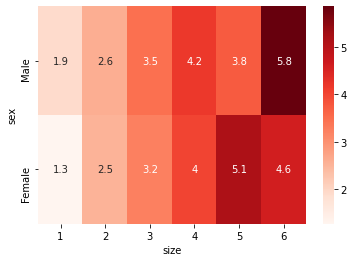

In [15]:
pivot = tips.pivot_table(index='sex', columns='size', values='tip')
sns.heatmap(pivot, cmap='Reds', annot=True)
plt.show()

### 3.
타이타닉 승객 데이터를 이용하여 다음 분석을 실시하라. 데이터는 다음과 같이 받을 수 있다.


In [16]:
titanic=sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


1)qcut 명령으로 세 개의 나이 그룹을 만든다.

In [18]:
import pandas as pd
titanic['Age_qcut']=0
titanic['Age_qcut']=pd.qcut(titanic.age,3,labels=['A','B','C'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_qcut
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,A
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,B
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,C
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,B
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,A
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,B


2)성별, 선실, 나이 그룹에 의한 생존율을 데이터프레임으로 계산한다. 행에는 성별 및 나이 그룹에 대한 다중 인덱스를 사용하고 열에는 선실 인덱스를 사용한다. 생존률은 해당 그룹의 생존 인원수를 전체 인원수로 나눈 값이다.

In [19]:
titanic.groupby(['survived', 'Age_qcut']).size().groupby(level = 0).apply(lambda x : x / float(x.sum()))

survived  Age_qcut
0         A           0.337264
          B           0.327830
          C           0.334906
1         A           0.355172
          B           0.320690
          C           0.324138
dtype: float64

3) 성별 및 선실에 의한 생존율을 피봇 데이터 형태로 만든다

In [20]:
titanic.pivot_table( index = ['Age_qcut', 'sex'], columns = 'pclass',
                    values = 'survived',
                    aggfunc = lambda x : (sum(x) / sum(titanic['survived'])))

pclass                  1         2         3
Age_qcut sex                                 
A        female  0.061404  0.058480  0.087719
         male    0.014620  0.029240  0.049708
B        female  0.052632  0.087719  0.038012
         male    0.032164  0.008772  0.052632
C        female  0.125731  0.052632  0.011696
         male    0.070175  0.005848  0.008772

## 4.

- 다음 코드를 실행하면 MNIST 숫자 이미지 전체 데이터를 모두 벡터로 변환하여 하나의 넘파이 행렬 X를 만든다. 
- 이 행렬을 이용하여 다음 문제를 풀어라.

In [21]:
from sklearn.datasets import load_digits
import numpy as np

1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.

In [22]:
X = load_digits().data
digits = load_digits()
X.shape
# (8 x 8)

(1797, 64)

In [23]:
v1 = X[0].reshape(64,1)
v10 = X[9].reshape(64,1)

img = []; v = []; samples = [0,9]
for i in range(2):
    img.append(digits.images[samples[i]])
    v.append(img[i].reshape(64,1))

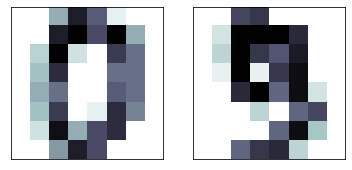

In [24]:
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(img[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])

In [25]:
np.dot(v1.T,v10)

array([[2807.]])

2) 코사인유사도를 이용하여 첫 번째 이미지와 10 번째 이미지의 유사도를 구하라

In [26]:
sum(X[0]*X[9])/(sum((X[0]**2)**0.5)*sum((X[9]**2)**0.5))

0.02902011868577218

### 5.

datetime - hourly date + timestamp 

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [27]:
import pandas as pd

df=pd.read_csv("0402_test.csv", parse_dates=['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [29]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour

In [30]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


1)각 칼럼값에 따른 count값의 변화를 시각화 하시오

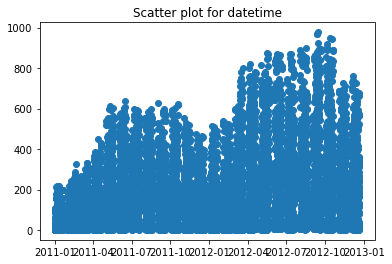

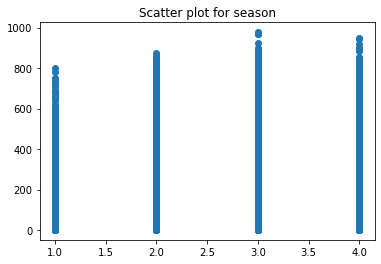

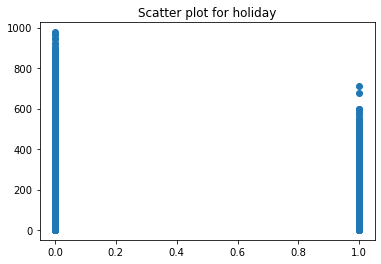

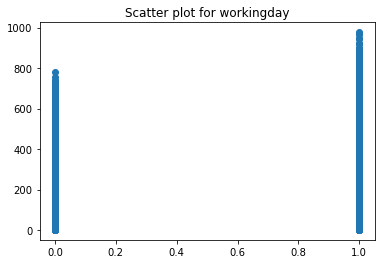

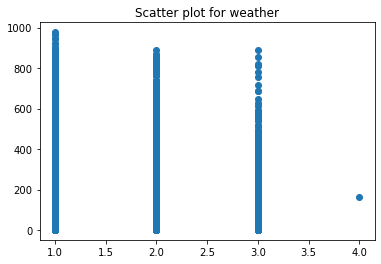

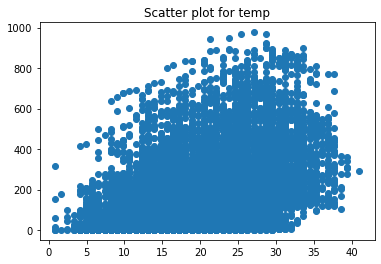

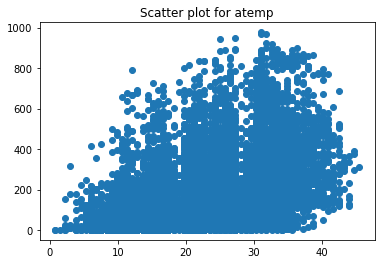

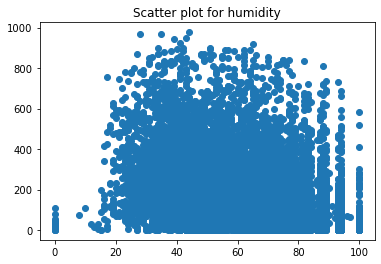

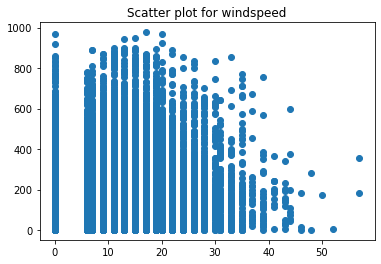

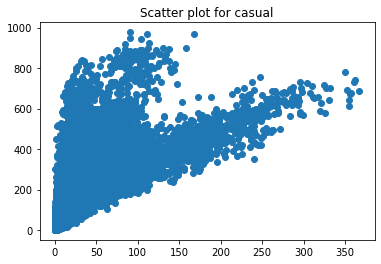

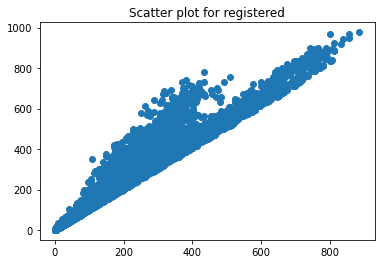

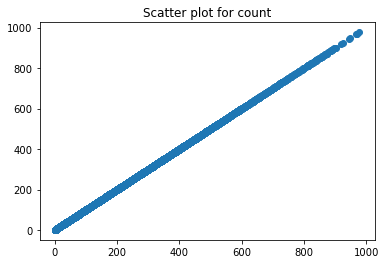

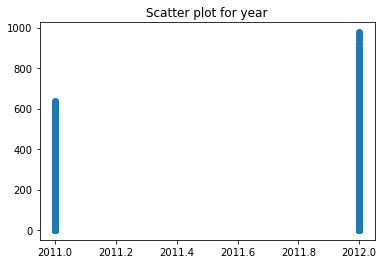

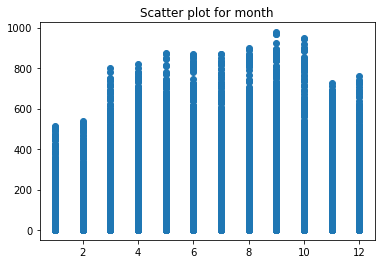

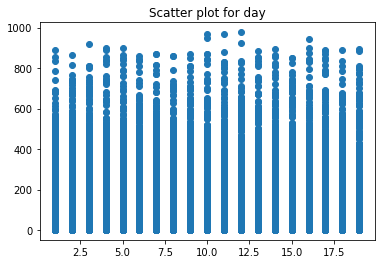

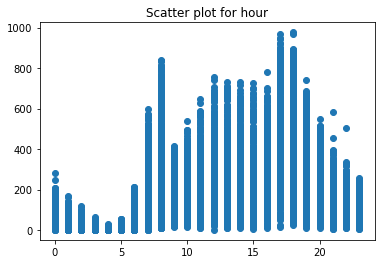

In [31]:
def scatter():
    for i in df.columns:
        plt.scatter(df[i],df['count'])
        plt.title(f"Scatter plot for {i}")
        plt.show()
scatter()

season

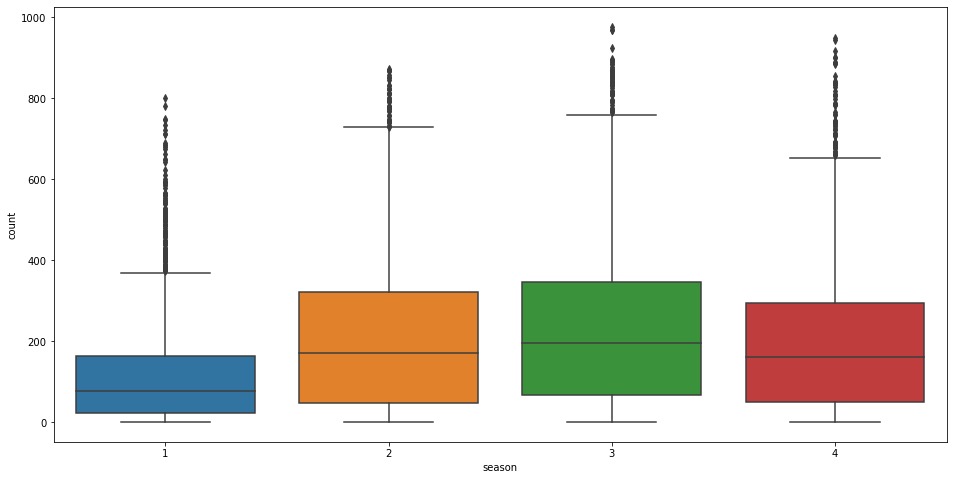

In [32]:
plt.figure(figsize=(16,8))
sns.boxplot(x='season', y='count', data=df)

atemp

Text(0, 0.5, 'count')

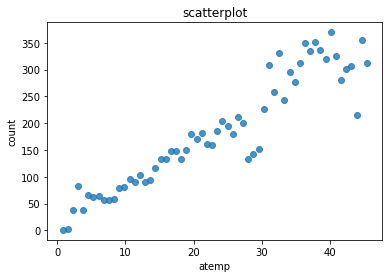

In [33]:
count_atemp=df.pivot_table("count",index="atemp").reset_index("atemp")
ax=plt.subplots()
ax=sns.regplot(x="atemp",y="count",data=count_atemp, fit_reg=False)

ax.set_title("scatterplot")
ax.set_xlabel("atemp")
ax.set_ylabel("count")

2) 각 칼럼과 count 칼럼간의 상관관계를 조사하시오 (registered와 casual은 제외)

In [34]:
# datetime 변수를 year month day hour로 바꿔줬으니 같이 삭제하자
# registered와 casual 의 합이 count이므로 지워야함
train_df = df.drop(['datetime', 'casual', 'registered'], axis=1)

In [35]:
train_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234


In [36]:
train_df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
year          0.260403
month         0.166862
day           0.019826
hour          0.400601
Name: count, dtype: float64